Notebook where to plot the curves and display the performance of all models in 
a chosen folder. It is also where to conduct the performance analysis about the
models database.

In [53]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import pearsonr, ttest_1samp
from sklearn.linear_model import LinearRegression

from contrastive.utils.models_database import import_bdd

In [45]:
database_path = "/neurospin/dico/data/deep_folding/papers/ipmi2023/models/contrastive/summary/bdd_gridsearch-HCP-half-2_evaluation-ACCpatterns-1.csv"
save_fig_path = "/host/home/jc225751/Nextcloud/Travail/05 - Articles/IPMI_2023/figures"

## Use the testing database

In [46]:
bdd = pd.read_csv(database_path, index_col=0)
print(len(bdd))
bdd.groupby(['num_representation_features','backbone_name', 'foldlabel']).count()

83


model_path  auc  auc_std  \
num_representation_features backbone_name foldlabel                             
4                           convnet       False               5    5        5   
                                          True                5    5        5   
                            densenet      False               5    5        5   
                                          True                5    5        5   
                            pointnet      False               1    1        1   
                                          True                5    5        5   
10                          convnet       False               5    5        5   
                                          True                5    5        5   
                            densenet      False               5    5        5   
                                          True                5    5        5   
                            pointnet      False               2    2        2   
                                          True                5    5        5   
30                          convnet       False               5    5        5   
                                          True                5    5        5   
                            densenet      False               5    5        5   
                                          True               10   10       10   
                            pointnet      True                5    5        5   

                                                     accuracy  accuracy_std  \
num_representation_features backbone_name foldlabel                           
4                           convnet       False             5             5   
                                          True              5             5   
                            densenet      False             5             5   
                                          True              5             5   
                            pointnet      False             1             1   
                                          True              5             5   
10                          convnet       False             5             5   
                                          True              5             5   
                            densenet      False             5             5   
                                          True              5             5   
                            pointnet      False             2             2   
                                          True              5             5   
30                          convnet       False             5             5   
                                          True              5             5   
                            densenet      False             5             5   
                                          True             10            10   
                            pointnet      True              5             5   

                                                     train_loss  val_loss  \
num_representation_features backbone_name foldlabel                         
4                           convnet       False               5         5   
                                          True                5         5   
                            densenet      False               5         5   
                                          True                5         5   
                            pointnet      False               1         1   
                                          True                5         5   
10                          convnet       False               5         5   
                                          True                5         5   
                            densenet      False               5         5   
                                          True                5         5   
                            pointnet      False               2         2   
          

In [27]:
bdd = pd.read_csv(database_path, index_col=0)
bdd.sort_values(by='auc', ascending=False, inplace=True)
bdd.head()
# clean_bdd = bdd[bdd.exclude == 'False']
# len(bdd)

,model_path,auc,auc_std,accuracy,accuracy_std,backbone_name,foldlabel,num_representation_features,train_loss,val_loss,num_outputs,git_branch
23,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.749093,0.057790,0.652374,0.064863,densenet,True,30,0.428373,1.149933,NaN,Run_03_aymeric
1,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.736776,0.006986,0.692491,0.010596,convnet,True,10,0.446647,0.586467,10.0,Run_03_aymeric
3,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.714800,0.003163,0.692117,0.008044,convnet,True,10,0.492764,1.040693,10.0,Run_03_aymeric
2,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.707890,0.005006,0.640678,0.010666,convnet,True,10,0.440111,0.937599,10.0,Run_03_aymeric
0,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.704660,0.011935,0.658737,0.012274,convnet,True,10,0.412197,0.952290,10.0,Run_03_aymeric


In [28]:
bdd = import_bdd(database_path, verbose=True)
bdd.sort_values(by='auc', inplace=True)
bdd = bdd[bdd.exclude == 'False']
bdd

path /neurospin/dico/data/deep_folding/papers/ipmi2023/models/contrastive/summary/bdd_gridsearch-HCP-half-2_evaluation-ACCpatterns-1.csv
0 have been removed for bad learning


,model_path,auc,auc_std,accuracy,accuracy_std,backbone_name,foldlabel,num_representation_features,train_loss,val_loss,num_outputs,git_branch,exclude
62,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.356467,0.010180,0.533263,0.002772,convnet,False,4,1.610433,1.780775,NaN,Run_03_aymeric,False
64,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.370919,0.012336,0.500257,0.006320,convnet,False,4,0.961515,0.989410,NaN,Run_03_aymeric,False
63,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.391440,0.019894,0.453263,0.004656,convnet,False,4,1.644006,1.606378,NaN,Run_03_aymeric,False
61,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.393435,0.018497,0.527860,0.002630,convnet,False,4,0.938425,1.282051,NaN,Run_03_aymeric,False
52,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.420557,0.008571,0.472982,0.004655,convnet,False,10,0.217970,0.337364,NaN,Run_03_aymeric,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.704660,0.011935,0.658737,0.012274,convnet,True,10,0.412197,0.952290,10.0,Run_03_aymeric,False
2,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.707890,0.005006,0.640678,0.010666,convnet,True,10,0.440111,0.937599,10.0,Run_03_aymeric,False
3,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.714800,0.003163,0.692117,0.008044,convnet,True,10,0.492764,1.040693,10.0,Run_03_aymeric,False
1,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.736776,0.006986,0.692491,0.010596,convnet,True,10,0.446647,0.586467,10.0,Run_03_aymeric,False


In [29]:
len(bdd)

83

In [30]:
# interesting_columns = ["model_path", 'auc', 'auc_std', 'backbone_name', 'batch_size', 'dataset_name', 'drop_rate', 'foldlabel',
#                        'num_representation_features', 'temperature']
# bdd[interesting_columns].iloc[:10,:]

In [31]:
# interesting_columns = ["model_path", 'auc', 'auc_std', 'backbone_name', 'batch_size', 'dataset_name', 'drop_rate', 'foldlabel',
#                        'num_representation_features', 'temperature']
# bdd[interesting_columns].iloc[:10,:]

### Performance histogram

In [32]:
backbones = ['convnet', 'densenet', 'pointnet']
foldlabels = [False, True]
dimensions = [4, 10, 30]

n_bb = len(backbones)
n_fold = len(foldlabels)
n_dims = len(dimensions)

colors = ['r', 'b', 'g']

pca4 = [0.537, 0.097]
pca10 = [0.548, 0.074]
pca30 = [0.587, 0.055]

pca = [pca4[0], pca10[0], pca30[0]]
std_pca = [pca4[1], pca10[1], pca30[1]]

clean_bdd = bdd

In [33]:
len(clean_bdd)

83

In [34]:
def performance_histogram(bdd, main, x, y, filters, colors=['r', 'b', 'g'], extended=True):
    n_x = len(x)
    n_y = len(y)
    
    plt.figure()
    bins = np.arange(0.45, 0.71, step=0.01)

    for i,element in enumerate(main):
        filtered_bdd = bdd[(bdd[filters[0]] == element) & ~(bdd.model_path.str.contains('unfinished'))]
        print(f"{element}, N = {filtered_bdd.shape[0]}, mean performance: {filtered_bdd.auc.mean()}")
        plt.hist(filtered_bdd['auc'].values, bins, color=colors[i], alpha=0.6)
        plt.xlabel('auc')
    
    if main == dimensions:
        ax = plt.gca()
        y_min, y_max = ax.get_ylim()
        plt.vlines(pca4[0], ymin=y_min, ymax=y_max, colors='blue')
        plt.vlines(pca10[0], ymin=y_min, ymax=y_max, colors='red')
        plt.vlines(pca30[0], ymin=y_min, ymax=y_max, colors='green')

    
    if main == foldlabels:
        plt.legend(["no_foldlabel", "foldlabel"])
    elif main == backbones:
        plt.legend(["convnet", "densenet", "pointnet"])
    elif main == dimensions:
        plt.legend(['pca (dim=4)', 'pca (dim=10)', 'pca (dim=30)'] + main, loc='upper left')
    plt.show()

    if extended:
        plt.figure(figsize=(n_y*6.4, n_x*4.8))

        for j in range(n_x):
            for k in range(n_y):
                pre_filtered_bdd = bdd[(bdd[filters[1]] == x[j]) & (bdd[filters[2]] == y[k])]
                print(x[j], y[k])
                plt.subplot(n_x, n_y, k + n_y*j + 1)
                for i,element in enumerate(main):
                    filtered_bdd = pre_filtered_bdd[(pre_filtered_bdd[filters[0]] == element) & ~(pre_filtered_bdd.model_path.str.contains('unfinished'))]
                    print(f"{element}, N = {filtered_bdd.shape[0]}, mean performance: {filtered_bdd.auc.mean()}")
                    plt.hist(filtered_bdd['auc'].values, bins, color=colors[i], alpha=0.6)
                    plt.xlabel('auc')
                    plt.title(str(x[j])+' '+ str(y[k]))
                print()
                plt.legend(main)
        plt.show()

convnet, N = 30, mean performance: 0.5905531078184699
densenet, N = 35, mean performance: 0.5792639003155078
pointnet, N = 18, mean performance: 0.535776038269189


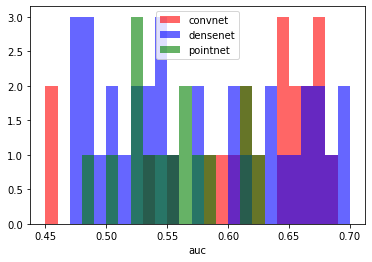

In [35]:
performance_histogram(clean_bdd, backbones, foldlabels, dimensions, filters=['backbone_name', 'foldlabel', 'num_representation_features'],
                      extended=False)

False, N = 33, mean performance: 0.523402478799739
True, N = 50, mean performance: 0.6072503326810176


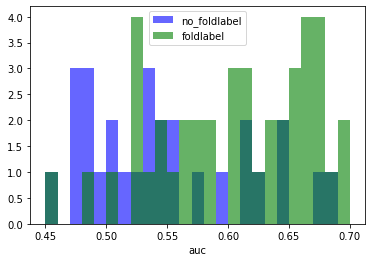

In [36]:
performance_histogram(clean_bdd, foldlabels, dimensions, backbones, filters=['foldlabel', 'num_representation_features', 'backbone_name'],
                      colors=['b', 'g'], extended=False)

4, N = 26, mean performance: 0.5042647254897743
10, N = 27, mean performance: 0.5835723293883764
30, N = 30, mean performance: 0.6255820892740658


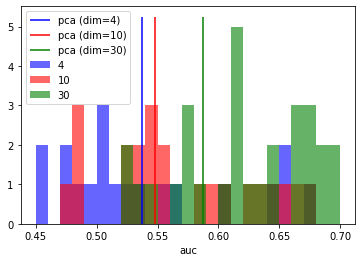

In [37]:
performance_histogram(clean_bdd, dimensions, foldlabels, backbones, filters=['num_representation_features', 'foldlabel', 'backbone_name'],
                      colors=['b', 'r', 'g'], extended=False)

### Results tables

In [38]:
def significance_over_pca(backbone, foldlabel, dim, bdd=clean_bdd):
    filtered_df = bdd[(bdd.backbone_name == backbone) & (bdd.foldlabel == foldlabel) & (bdd.num_representation_features == dim)]
    aucs = filtered_df.auc
    if dim == 4:
        pca = pca4
    elif dim == 10:
        pca = pca10
    elif dim == 30:
        pca = pca30
    else:
        raise ValueError('Not a dimension the PCA is evaluated for')
    
    return ttest_1samp(aucs, pca[0])

In [39]:
idx = ['no foldlabel 4', 'foldlabel 4', 'no_foldlabel_10', 'foldlabel_10', 'no foldlabel 30', 'foldlabel 30']

size_rows = len(dimensions)*len(foldlabels)
df = pd.DataFrame(np.zeros((size_rows,3)), index=idx, columns=backbones)
std_df = pd.DataFrame(np.zeros((size_rows,3)), index=idx, columns=backbones)
count_df = pd.DataFrame(np.zeros((size_rows,3)), index=idx, columns=backbones, dtype=int)
p_values_df = pd.DataFrame(np.zeros((size_rows,3)), index=idx, columns=backbones)

for backbone in backbones:
    i = 0
    for dim in dimensions:
        for foldlabel in foldlabels:
            filtered_bdd = clean_bdd[(clean_bdd.backbone_name == backbone) & (clean_bdd.foldlabel == foldlabel) & (clean_bdd.num_representation_features == dim)]
            df[backbone][i] = filtered_bdd.auc.mean()
            std_df[backbone][i] = filtered_bdd.auc.std()
            count_df[backbone][i] =  filtered_bdd.count()[0]
            p_values_df[backbone][i] = significance_over_pca(backbone, foldlabel, dim, bdd=clean_bdd)[1]
            i+=1

df

/host/volatile/jc225751/Runs/48_aymeric/Program/venv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/host/volatile/jc225751/Runs/48_aymeric/Program/venv/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/host/volatile/jc225751/Runs/48_aymeric/Program/venv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/host/volatile/jc225751/Runs/48_aymeric/Program/venv/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/host/volatile/jc225751/Runs/48_aymeric/Program/venv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/host/volatile/jc225751/Runs/48_aymeric/Program/venv/lib/python3.6/

,convnet,densenet,pointnet
no foldlabel 4,0.393048,0.493835,0.501064
foldlabel 4,0.616524,0.545325,0.473232
no_foldlabel_10,0.549561,0.492827,0.543127
foldlabel_10,0.706273,0.625369,0.560011
no foldlabel 30,0.649219,0.558504,NaN
foldlabel 30,0.628694,0.669494,0.578087


In [40]:
clean_bdd.head()

,model_path,auc,auc_std,accuracy,accuracy_std,backbone_name,foldlabel,num_representation_features,train_loss,val_loss,num_outputs,git_branch,exclude
62,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.356467,0.010180,0.533263,0.002772,convnet,False,4,1.610433,1.780775,NaN,Run_03_aymeric,False
64,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.370919,0.012336,0.500257,0.006320,convnet,False,4,0.961515,0.989410,NaN,Run_03_aymeric,False
63,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.391440,0.019894,0.453263,0.004656,convnet,False,4,1.644006,1.606378,NaN,Run_03_aymeric,False
61,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.393435,0.018497,0.527860,0.002630,convnet,False,4,0.938425,1.282051,NaN,Run_03_aymeric,False
52,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.420557,0.008571,0.472982,0.004655,convnet,False,10,0.217970,0.337364,NaN,Run_03_aymeric,False


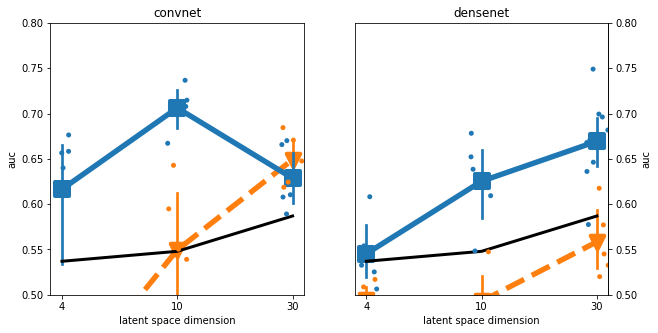

In [77]:
clean_bdd['num_representation_features'] = clean_bdd['num_representation_features'].astype(str)
f, axs = plt.subplots(1, 2, figsize=(10, 5))
index = ['4','10','30']
backbones = ["convnet", "densenet"]
for ax, backbone in zip(axs, backbones):
    sns.pointplot(data=clean_bdd[clean_bdd.backbone_name==backbone], x=clean_bdd.num_representation_features, y="auc", hue = "foldlabel", palette=['C1', 'C0'], markers=['v', 's'], scale=2, linestyles=['--', '-'], ax=ax)
    sns.stripplot(data=clean_bdd[clean_bdd.backbone_name==backbone], x=clean_bdd.num_representation_features, y="auc", hue = "foldlabel", palette=['C1', 'C0'], jitter=.1, ax=ax)
    ax.plot(index, pca, color='black', linewidth=3)
    ax.set_title(backbone)
    ax.set_xlabel("latent space dimension")
    if backbone != "convnet":
        ax.set_ylabel("")
        ax.set_yticks([])
    if backbone == "densenet":
        secax = ax.secondary_yaxis('right')
        secax.set_ylabel('auc')
    ax.legend([],[], frameon=False)
    ax.set_ylim([0.5,0.8])
plt.savefig(save_fig_path + "/testing.svg")

In [ ]:
std_df

,convnet,densenet,pointnet
no foldlabel 4,0.024422,0.024160,0.049686
foldlabel 4,0.016590,0.053402,0.065810
no_foldlabel_10,0.031458,0.017226,0.042754
foldlabel_10,0.024596,0.029230,0.041121
no foldlabel 30,0.034445,0.029689,0.032650
foldlabel 30,0.083000,0.035044,0.031430


In [ ]:
count_df

,convnet,densenet,pointnet
no foldlabel 4,6,5,7
foldlabel 4,5,5,5
no_foldlabel_10,5,5,5
foldlabel_10,5,5,5
no foldlabel 30,5,5,5
foldlabel 30,5,5,11


In [ ]:
print(pca4[0], pca10[0], pca30[0])
p_values_df

0.537 0.548 0.587


,convnet,densenet,pointnet
no foldlabel 4,0.000019,0.079325,0.168051
foldlabel 4,0.000011,0.187929,0.016716
no_foldlabel_10,0.000256,0.030544,0.056560
foldlabel_10,0.000050,0.000186,0.017008
no foldlabel 30,0.002253,0.005983,0.013955
foldlabel 30,0.113637,0.000628,0.000079


## Use the different-n database

In [150]:
database_path = "/neurospin/dico/data/deep_folding/papers/ipmi2023/models/contrastive/summary/bdd_HCP-half-2-different-n_evaluation-ACCpatterns-1.csv"

In [166]:
bdd_n_site = import_bdd(database_path, verbose=True)
bdd_n_site.sort_values(by='auc', inplace=True)
bdd_n_site = bdd_n_site[bdd_n_site.exclude == 'False']
bdd_n_site["model_name"] = bdd_n_site.model_path.apply(lambda x: x.split(sep='/')[-2])
bdd_n_site.head()

path /neurospin/dico/data/deep_folding/papers/ipmi2023/models/contrastive/summary/bdd_HCP-half-2-different-n_evaluation-ACCpatterns-1.csv
0 have been removed for bad learning


,model_path,auc,auc_std,accuracy,accuracy_std,dataset_name,n_max,train_loss,val_loss,exclude,model_name
20,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.576132,0.000648,0.566737,0.002564,cingulate_HCP_half_2,1080,0.126548,1.404203,False,training-on-hcp-2-n=32
14,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.588597,0.001058,0.574924,0.003087,cingulate_HCP_half_2,1080,0.216281,1.227349,False,training-on-hcp-2-n=20
29,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.597297,0.000435,0.573333,0.001146,cingulate_HCP_half_2,1080,0.187300,0.371587,False,training-on-hcp-2-n=64
0,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.603070,0.001975,0.617918,0.005655,cingulate_ACCpatterns_0,1099,0.366950,0.807115,False,convnet-10
6,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.611652,0.001430,0.581310,0.005463,cingulate_HCP_half_2,1080,0.334988,0.770967,False,training-on-hcp-2-n=171


In [176]:
bdd_n = bdd_n_site[(bdd_n_site["dataset_name"] != "cingulate_ACCpatterns_0")].copy(deep=True)
bdd_n["n"] = bdd_n.model_name.apply(lambda x: int(float(x.split(sep='=')[-1])))
bdd_n = bdd_n[bdd_n["n"]<=551]
bdd_n['id'] = True
bdd_n.head()

,model_path,auc,auc_std,accuracy,accuracy_std,dataset_name,n_max,train_loss,val_loss,exclude,model_name,n,id
20,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.576132,0.000648,0.566737,0.002564,cingulate_HCP_half_2,1080,0.126548,1.404203,False,training-on-hcp-2-n=32,32,True
14,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.588597,0.001058,0.574924,0.003087,cingulate_HCP_half_2,1080,0.216281,1.227349,False,training-on-hcp-2-n=20,20,True
29,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.597297,0.000435,0.573333,0.001146,cingulate_HCP_half_2,1080,0.187300,0.371587,False,training-on-hcp-2-n=64,64,True
6,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.611652,0.001430,0.581310,0.005463,cingulate_HCP_half_2,1080,0.334988,0.770967,False,training-on-hcp-2-n=171,171,True
33,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.617072,0.000594,0.621988,0.003041,cingulate_HCP_half_2,1080,0.241915,0.908179,False,training-on-hcp-2-n=64,64,True


In [177]:
bdd_n.dtypes

model_path       object
auc             float64
auc_std         float64
accuracy        float64
accuracy_std    float64
dataset_name     object
n_max             int64
train_loss      float64
val_loss        float64
exclude          object
model_name       object
n                 int64
id                 bool
dtype: object

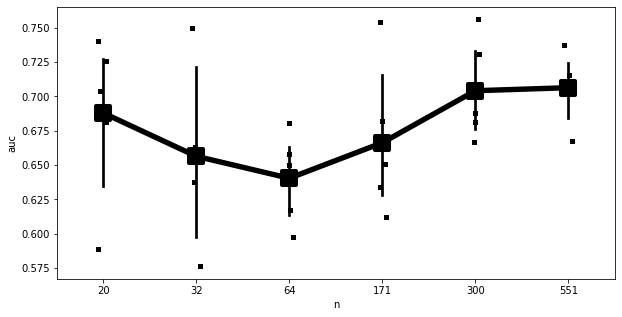

In [178]:
f, axs = plt.subplots(1, 1, figsize=(10, 5))
sns.pointplot(data=bdd_n, x=bdd_n.n, y="auc", palette=['black'], hue='id', markers='s', linestyles=['-'], scale=2,ax=axs)
sns.stripplot(data=bdd_n, x=bdd_n.n, y="auc", marker='s', palette=['black'], jitter=.05, ax=axs)
axs.legend([],[], frameon=False)

In [154]:
bdd_site = bdd_n_site[(bdd_n_site.model_name == "training-on-hcp-2-n=171") | (bdd_n_site.model_name == "convnet-10")].copy(deep=True)

In [143]:
bdd_site["training_set"] = bdd.model_name.apply(lambda x: "ACC-half-1" if x=="convnet-10" else "HCP-half-2")
bdd_site

,model_path,auc,auc_std,accuracy,accuracy_std,dataset_name,n_max,train_loss,val_loss,exclude,model_name,training_set
0,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.603070,0.001975,0.617918,0.005655,cingulate_ACCpatterns_0,1099,0.366950,0.807115,False,convnet-10,HCP-half-2
6,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.611652,0.001430,0.581310,0.005463,cingulate_HCP_half_2,1080,0.334988,0.770967,False,training-on-hcp-2-n=171,HCP-half-2
7,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.633521,0.001487,0.643743,0.002626,cingulate_HCP_half_2,1080,0.441397,1.325064,False,training-on-hcp-2-n=171,HCP-half-2
4,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.634630,0.004217,0.630924,0.009141,cingulate_ACCpatterns_0,1099,0.392562,0.963921,False,convnet-10,HCP-half-2
8,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.650575,0.001971,0.628023,0.006359,cingulate_HCP_half_2,1080,0.448146,1.168370,False,training-on-hcp-2-n=171,HCP-half-2
2,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.672797,0.002333,0.651064,0.004899,cingulate_ACCpatterns_0,1099,0.684845,1.195328,False,convnet-10,HCP-half-2
9,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.681469,0.004497,0.624982,0.005359,cingulate_HCP_half_2,1080,0.576510,0.870985,False,training-on-hcp-2-n=171,HCP-half-2
1,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.689958,0.002448,0.648491,0.003881,cingulate_ACCpatterns_0,1099,0.864139,1.108672,False,convnet-10,HCP-half-2
3,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.725479,0.001746,0.699509,0.006607,cingulate_ACCpatterns_0,1099,0.321559,0.865787,False,convnet-10,HCP-half-2
5,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.753826,0.000444,0.716842,0.002886,cingulate_HCP_half_2,1080,0.295679,0.724829,False,training-on-hcp-2-n=171,HCP-half-2


In [144]:
bdd_site.model_name.apply(lambda x: "conv" if x=="convnet-10" else 1)

0    conv
6       1
7       1
4    conv
8       1
2    conv
9       1
1    conv
3    conv
5       1
Name: model_name, dtype: object

In [145]:
bdd_site

,model_path,auc,auc_std,accuracy,accuracy_std,dataset_name,n_max,train_loss,val_loss,exclude,model_name,training_set
0,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.603070,0.001975,0.617918,0.005655,cingulate_ACCpatterns_0,1099,0.366950,0.807115,False,convnet-10,HCP-half-2
6,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.611652,0.001430,0.581310,0.005463,cingulate_HCP_half_2,1080,0.334988,0.770967,False,training-on-hcp-2-n=171,HCP-half-2
7,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.633521,0.001487,0.643743,0.002626,cingulate_HCP_half_2,1080,0.441397,1.325064,False,training-on-hcp-2-n=171,HCP-half-2
4,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.634630,0.004217,0.630924,0.009141,cingulate_ACCpatterns_0,1099,0.392562,0.963921,False,convnet-10,HCP-half-2
8,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.650575,0.001971,0.628023,0.006359,cingulate_HCP_half_2,1080,0.448146,1.168370,False,training-on-hcp-2-n=171,HCP-half-2
2,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.672797,0.002333,0.651064,0.004899,cingulate_ACCpatterns_0,1099,0.684845,1.195328,False,convnet-10,HCP-half-2
9,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.681469,0.004497,0.624982,0.005359,cingulate_HCP_half_2,1080,0.576510,0.870985,False,training-on-hcp-2-n=171,HCP-half-2
1,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.689958,0.002448,0.648491,0.003881,cingulate_ACCpatterns_0,1099,0.864139,1.108672,False,convnet-10,HCP-half-2
3,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.725479,0.001746,0.699509,0.006607,cingulate_ACCpatterns_0,1099,0.321559,0.865787,False,convnet-10,HCP-half-2
5,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.753826,0.000444,0.716842,0.002886,cingulate_HCP_half_2,1080,0.295679,0.724829,False,training-on-hcp-2-n=171,HCP-half-2
